# Exploration and Exploitation

In [142]:
from rdkit.Chem import AllChem as Chem
import umap
import pandas as pd
import os
import numpy as np
from sklearn.decomposition import PCA

def get_fp(list_of_smi):
    fingerprints = []
    mols = [Chem.MolFromSmiles(x) for x in list_of_smi]
    idx_to_remove = []
    for idx,mol in enumerate(mols):
        fprint = Chem.GetMorganFingerprintAsBitVect(mol, 2, useFeatures=False)
        fingerprints.append(fprint)
    return np.array(fingerprints)


In [143]:
ROOT = ".."

ki = pd.read_csv(os.path.join(ROOT, "data/raw/series4_processed.csv"))
ki = list(ki[ki["bin_activity"] == 0]["smiles"])

ka = pd.read_csv(os.path.join(ROOT, "data/raw/series4_processed.csv"))
ka = list(ka[ka["bin_activity"] == 1]["smiles"])

ena = pd.read_csv(os.path.join(ROOT, "data/evariste/enamine_boronics_virtual_lib.csv"))
ena = list(ena["smiles"])

eos = pd.read_csv(os.path.join(ROOT, "scripts/results/eosi_s4_candidates_90.csv"))
eos = list(eos["Smiles"])

In [144]:
colors = {
    "ki": "green",
    "ka": "blue",
    "ena": "purple",
    "eos": "red"
}

legend = {
    "ki": "Known inactives",
    "ka": "Known actives",
    "ena": "Exploitation",
    "eos": "Exploration"
}

smiles = {
    "ki": ki,
    "ka": ka,
    "ena": ena,
    "eos": eos
}


dec = PCA(2)

def projection(ax, sets):
    all_smiles = [smi for s in sets for smi in smiles[s]]
    X = get_fp(all_smiles)
    X_2d = dec.fit_transform(X)
    f = 0
    t = None
    for i, s in enumerate(sets):
        t = f + len(smiles[s])
        ax.scatter(X_2d[f:t,0], X_2d[f:t,1], color=colors[s], alpha=0.5, label=legend[s])
        ax.set_xlabel("Comp 1")
        ax.set_ylabel("Comp 2")
        if len(sets) == 3:
            ax.set_title("Focus on known actives")
        else:
            ax.set_title("Known series 4")
        f = t
    ax.legend(loc="upper right")
    return ax

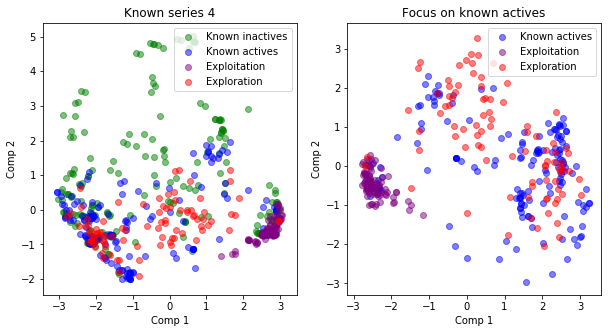

In [146]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs = axs.flatten()
projection(axs[0], ["ki", "ka", "ena", "eos"])
projection(axs[1], ["ka", "ena", "eos"])
plt.savefig("exploration_vs_exploitation.png", dpi=300)